In [3]:
import numpy as np
import pandas as pd
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
import os
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns
import gensim.downloader as api
import string
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import words
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import gensim.downloader as api
import re
from gensim.models.keyedvectors import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
vectorizer = CountVectorizer()

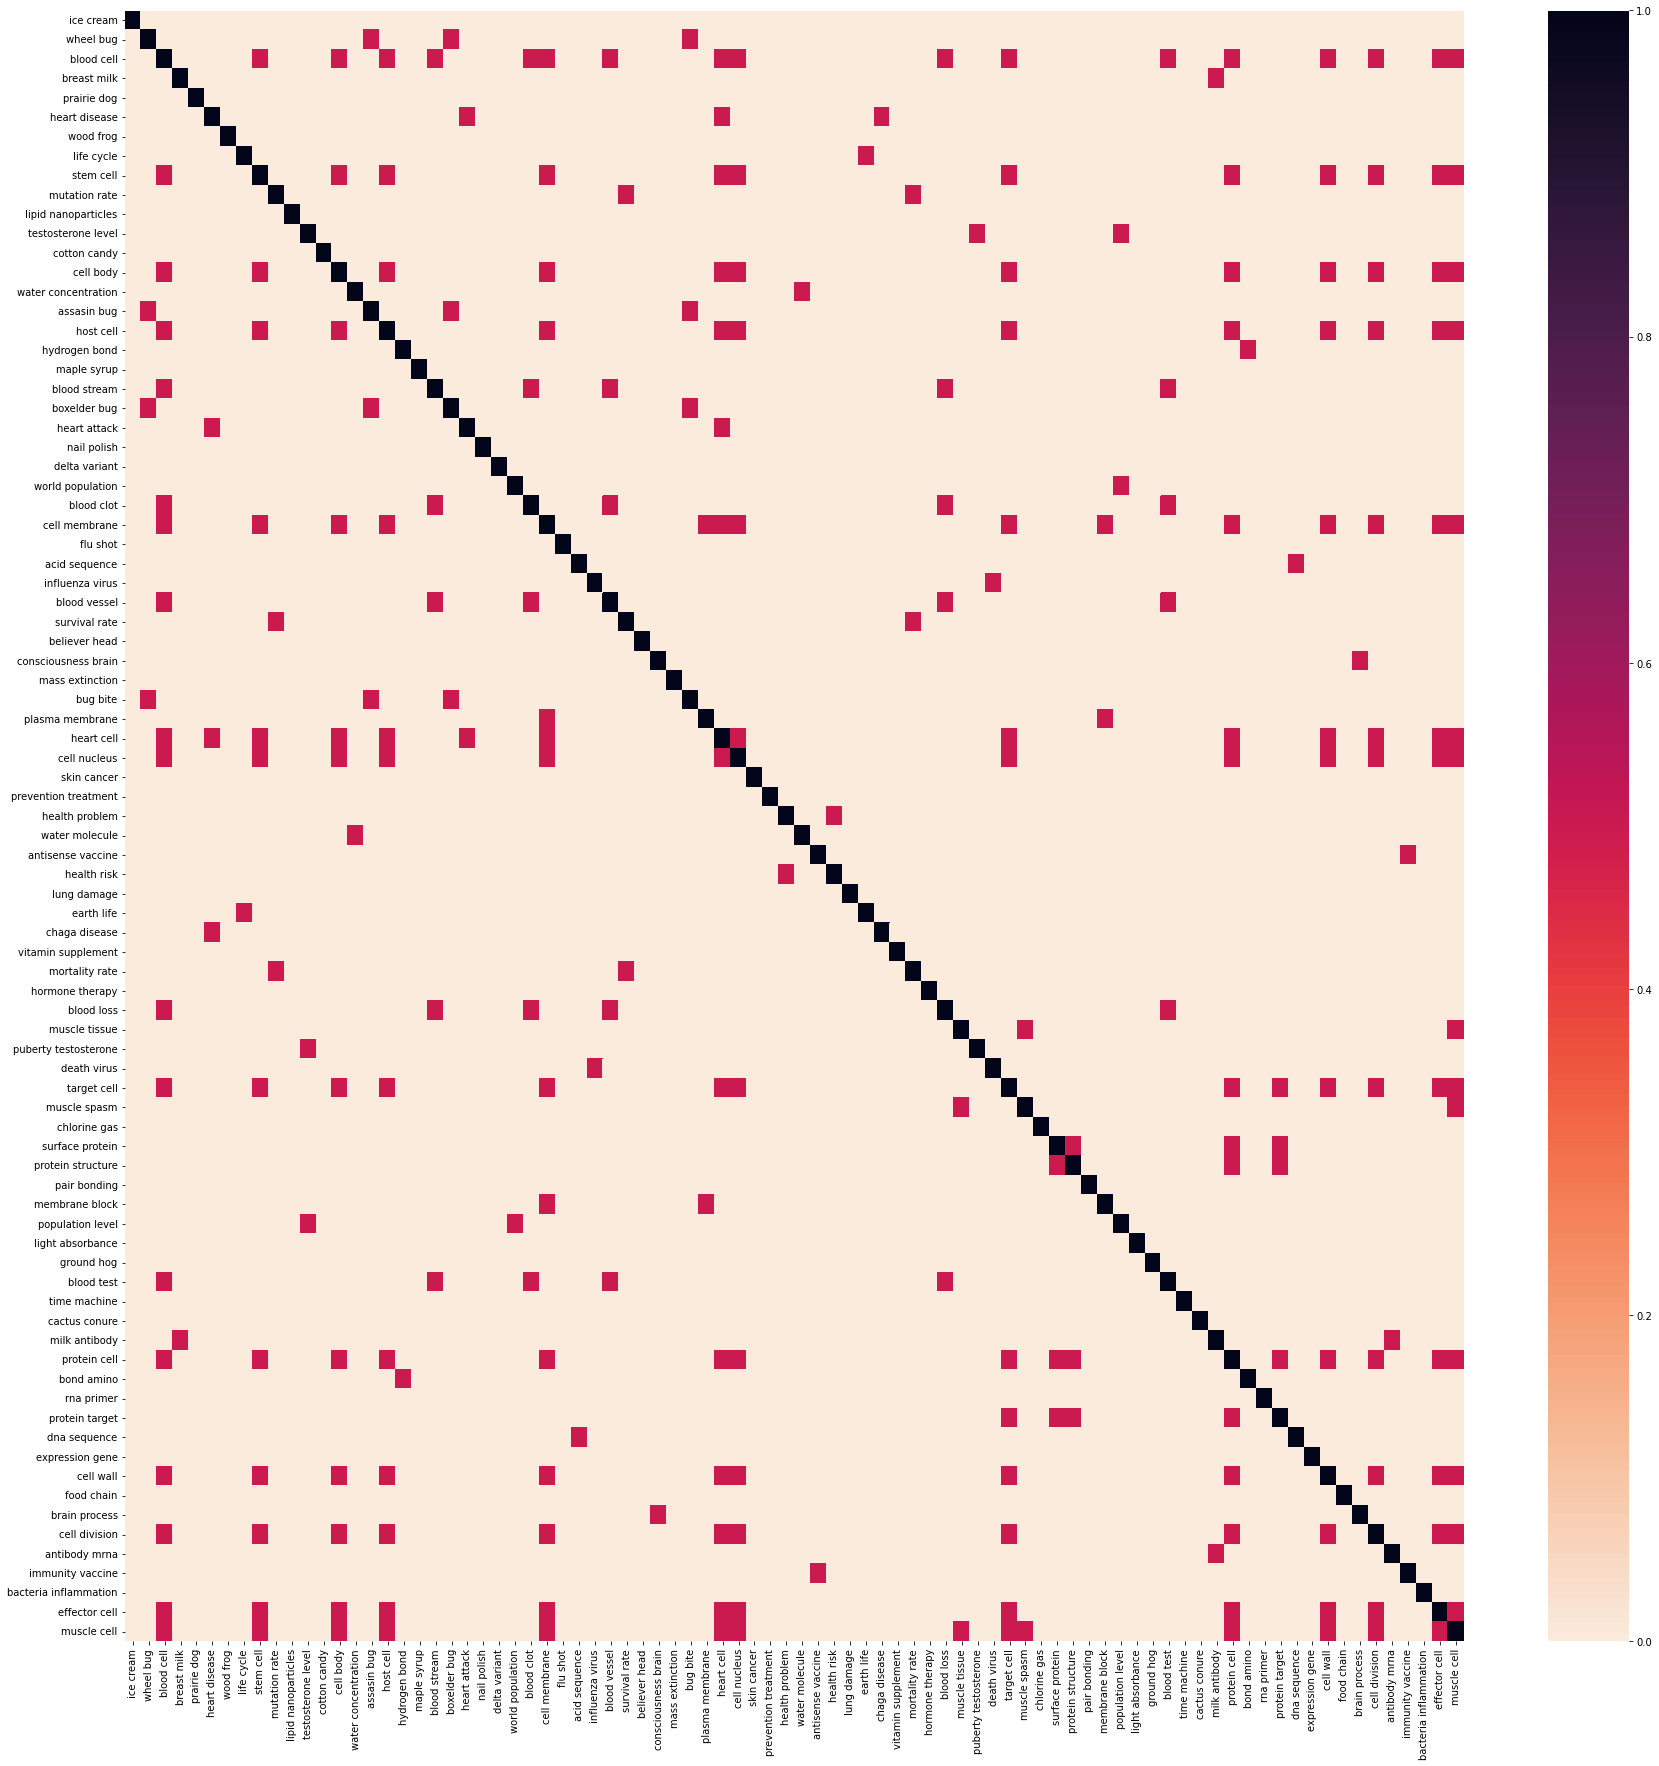

In [6]:
chemistry_bigrams = ['ice cream',
 'wheel bug',
 'blood cell',
 'breast milk',
 'prairie dog',
 'heart disease',
 'wood frog',
 'life cycle',
 'stem cell',
 'mutation rate',
 'lipid nanoparticles',
 'testosterone level',
 'cotton candy',
 'cell body',
 'water concentration',
 'assasin bug',
 'host cell',
 'hydrogen bond',
 'maple syrup',
 'blood stream',
 'boxelder bug',
 'heart attack',
 'nail polish',
 'delta variant',
 'world population',
 'blood clot',
 'cell membrane',
 'flu shot',
 'acid sequence',
 'influenza virus',
 'blood vessel',
 'survival rate',
 'believer head',
 'consciousness brain',
 'mass extinction',
 'bug bite',
 'plasma membrane',
 'heart cell',
 'cell nucleus',
 'skin cancer',
 'prevention treatment',
 'health problem',
 'water molecule',
 'antisense vaccine',
 'health risk',
 'lung damage',
 'earth life',
 'chaga disease',
 'vitamin supplement',
 'mortality rate',
 'hormone therapy',
 'blood loss',
 'muscle tissue',
 'puberty testosterone',
 'death virus',
 'target cell',
 'muscle spasm',
 'chlorine gas',
 'surface protein',
 'protein structure',
 'pair bonding',
 'membrane block',
 'population level',
 'light absorbance',
 'ground hog',
 'blood test',
 'time machine',
 'cactus conure',
 'milk antibody',
 'protein cell',
 'bond amino',
 'rna primer',
 'protein target',
 'dna sequence',
 'expression gene',
 'cell wall',
 'food chain',
 'brain process',
 'cell division',
 'antibody mrna',
 'immunity vaccine',
 'bacteria inflammation',
 'effector cell',
 'muscle cell']


X = vectorizer.fit_transform(chemistry_bigrams)

arr = X.toarray()

def create_heatmap(similarity, labels = chemistry_bigrams):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(30,30))
  sns.heatmap(df, cmap="rocket_r") 

create_heatmap(cosine_similarity(arr), chemistry_bigrams)

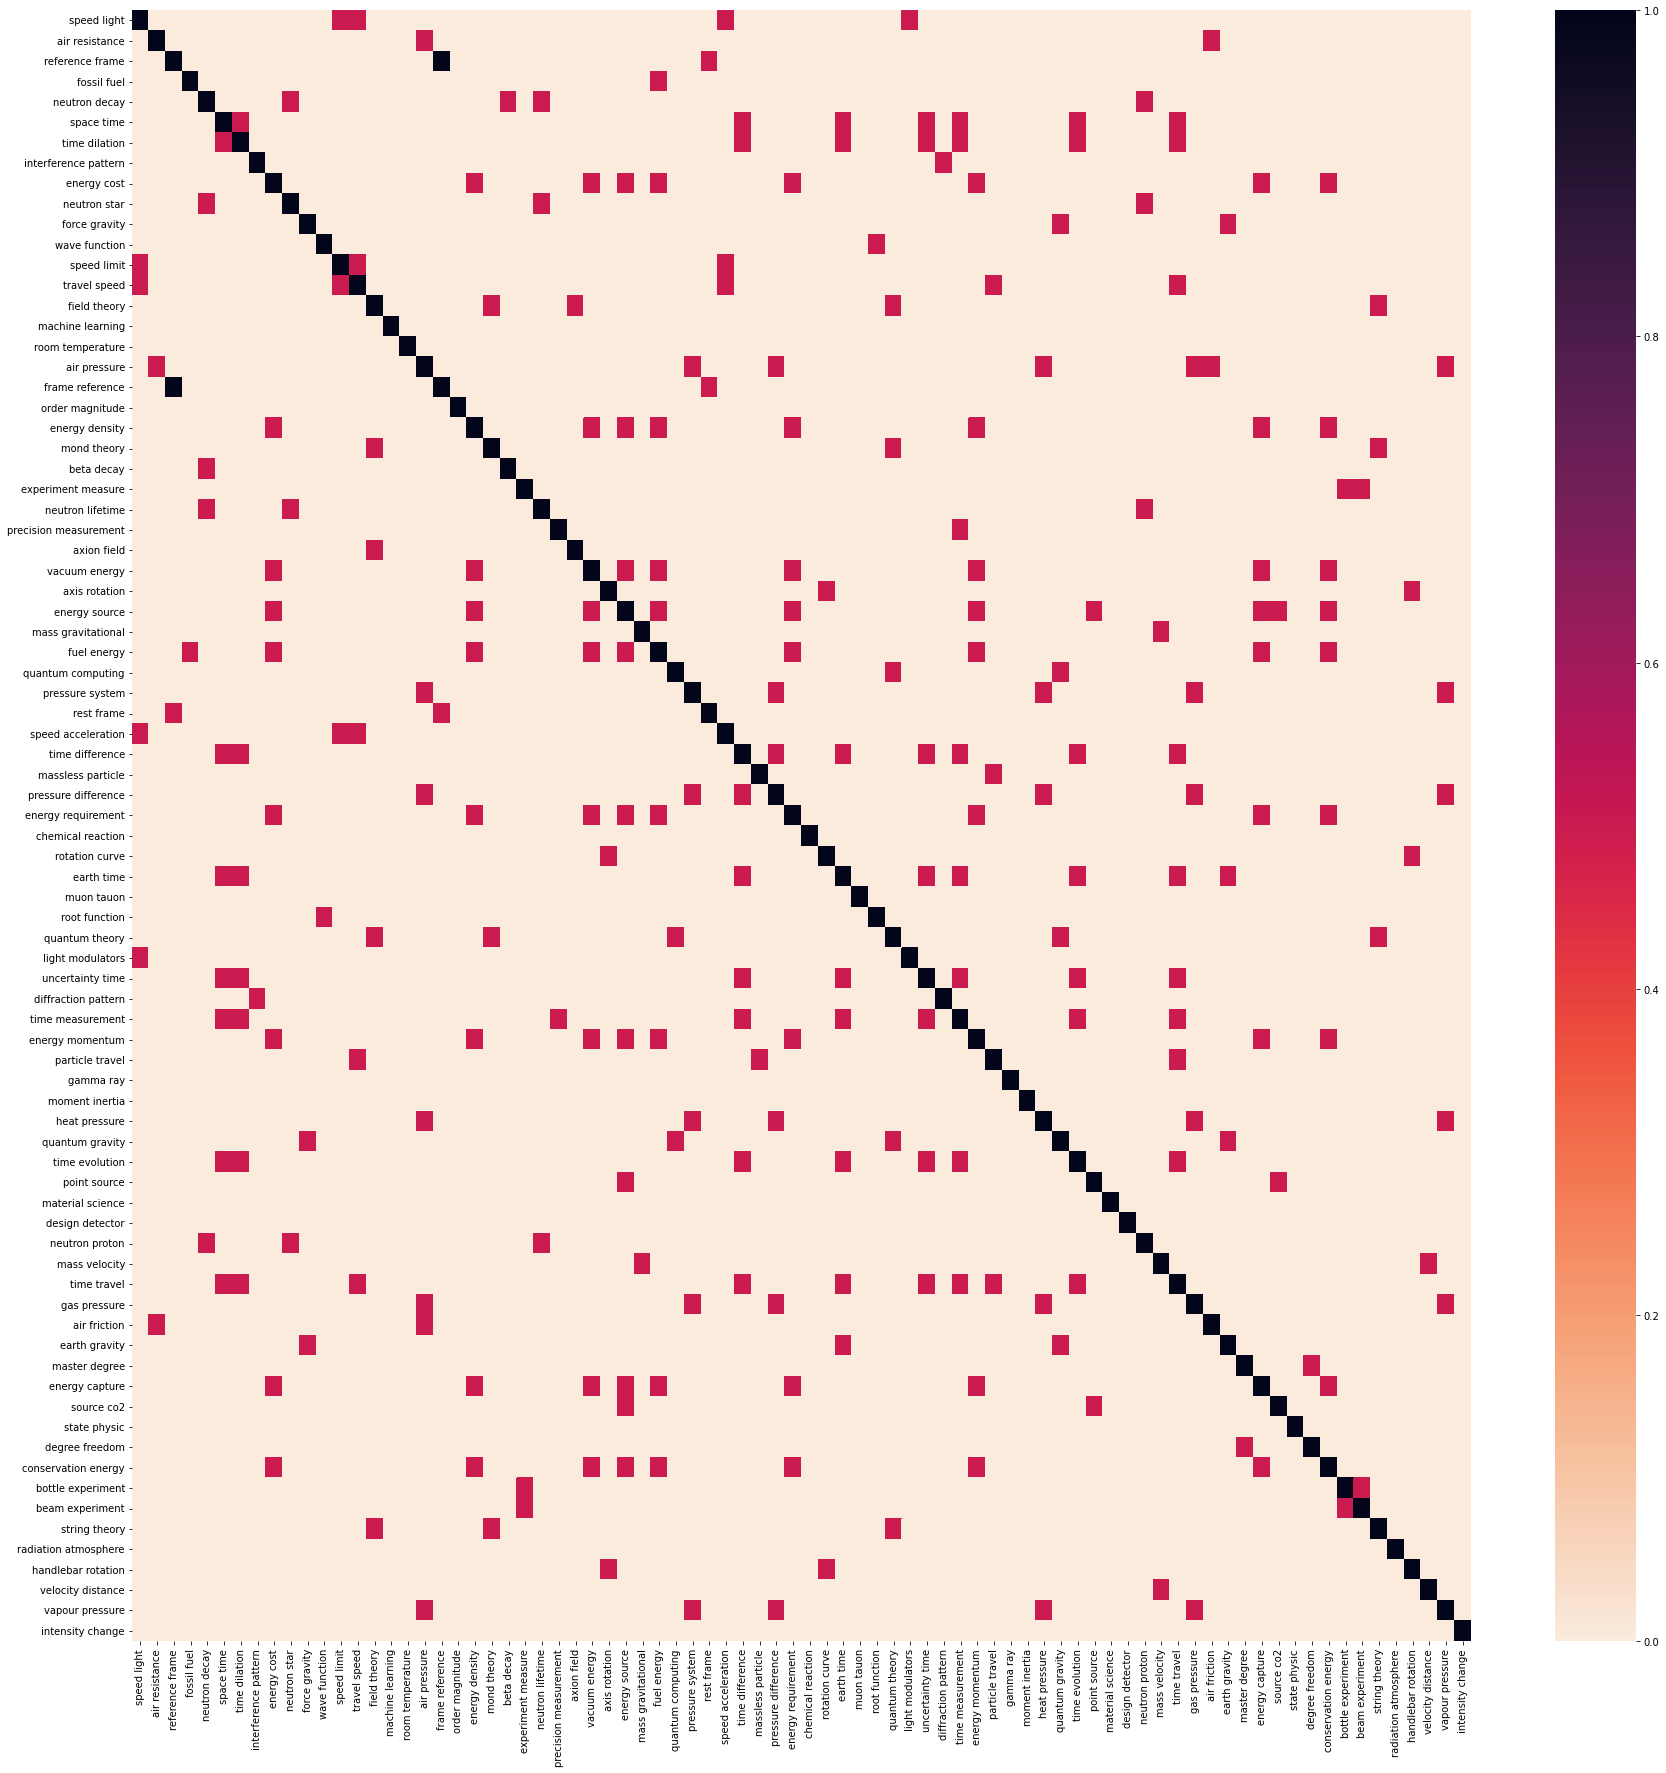

In [21]:
physics_words = ['speed light',
 'air resistance',
 'reference frame',
 'fossil fuel',
 'neutron decay',
 'space time',
 'time dilation',
 'interference pattern',
 'energy cost',
 'neutron star',
 'force gravity',
 'wave function',
 'speed limit',
 'travel speed',
 'field theory',
 'machine learning',
 'room temperature',
 'air pressure',
 'frame reference',
 'order magnitude',
 'energy density',
 'mond theory',
 'beta decay',
 'experiment measure',
 'neutron lifetime',
 'precision measurement',
 'axion field',
 'vacuum energy',
 'axis rotation',
 'energy source',
 'mass gravitational',
 'fuel energy',
 'quantum computing',
 'pressure system',
 'rest frame',
 'speed acceleration',
 'time difference',
 'massless particle',
 'pressure difference',
 'energy requirement',
 'chemical reaction',
 'rotation curve',
 'earth time',
 'muon tauon',
 'root function',
 'quantum theory',
 'light modulators',
 'uncertainty time',
 'diffraction pattern',
 'time measurement',
 'energy momentum',
 'particle travel',
 'gamma ray',
 'moment inertia',
 'heat pressure',
 'quantum gravity',
 'time evolution',
 'point source',
 'material science',
 'design detector',
 'neutron proton',
 'mass velocity',
 'time travel',
 'gas pressure',
 'air friction',
 'earth gravity',
 'master degree',
 'energy capture',
 'source co2',
 'state physic',
 'degree freedom',
 'conservation energy',
 'bottle experiment',
 'beam experiment',
 'string theory',
 'radiation atmosphere',
 'handlebar rotation',
 'velocity distance',
 'vapour pressure',
 'intensity change']

X = vectorizer.fit_transform(physics_words)

arr = X.toarray() 

create_heatmap(cosine_similarity(arr), physics_words)

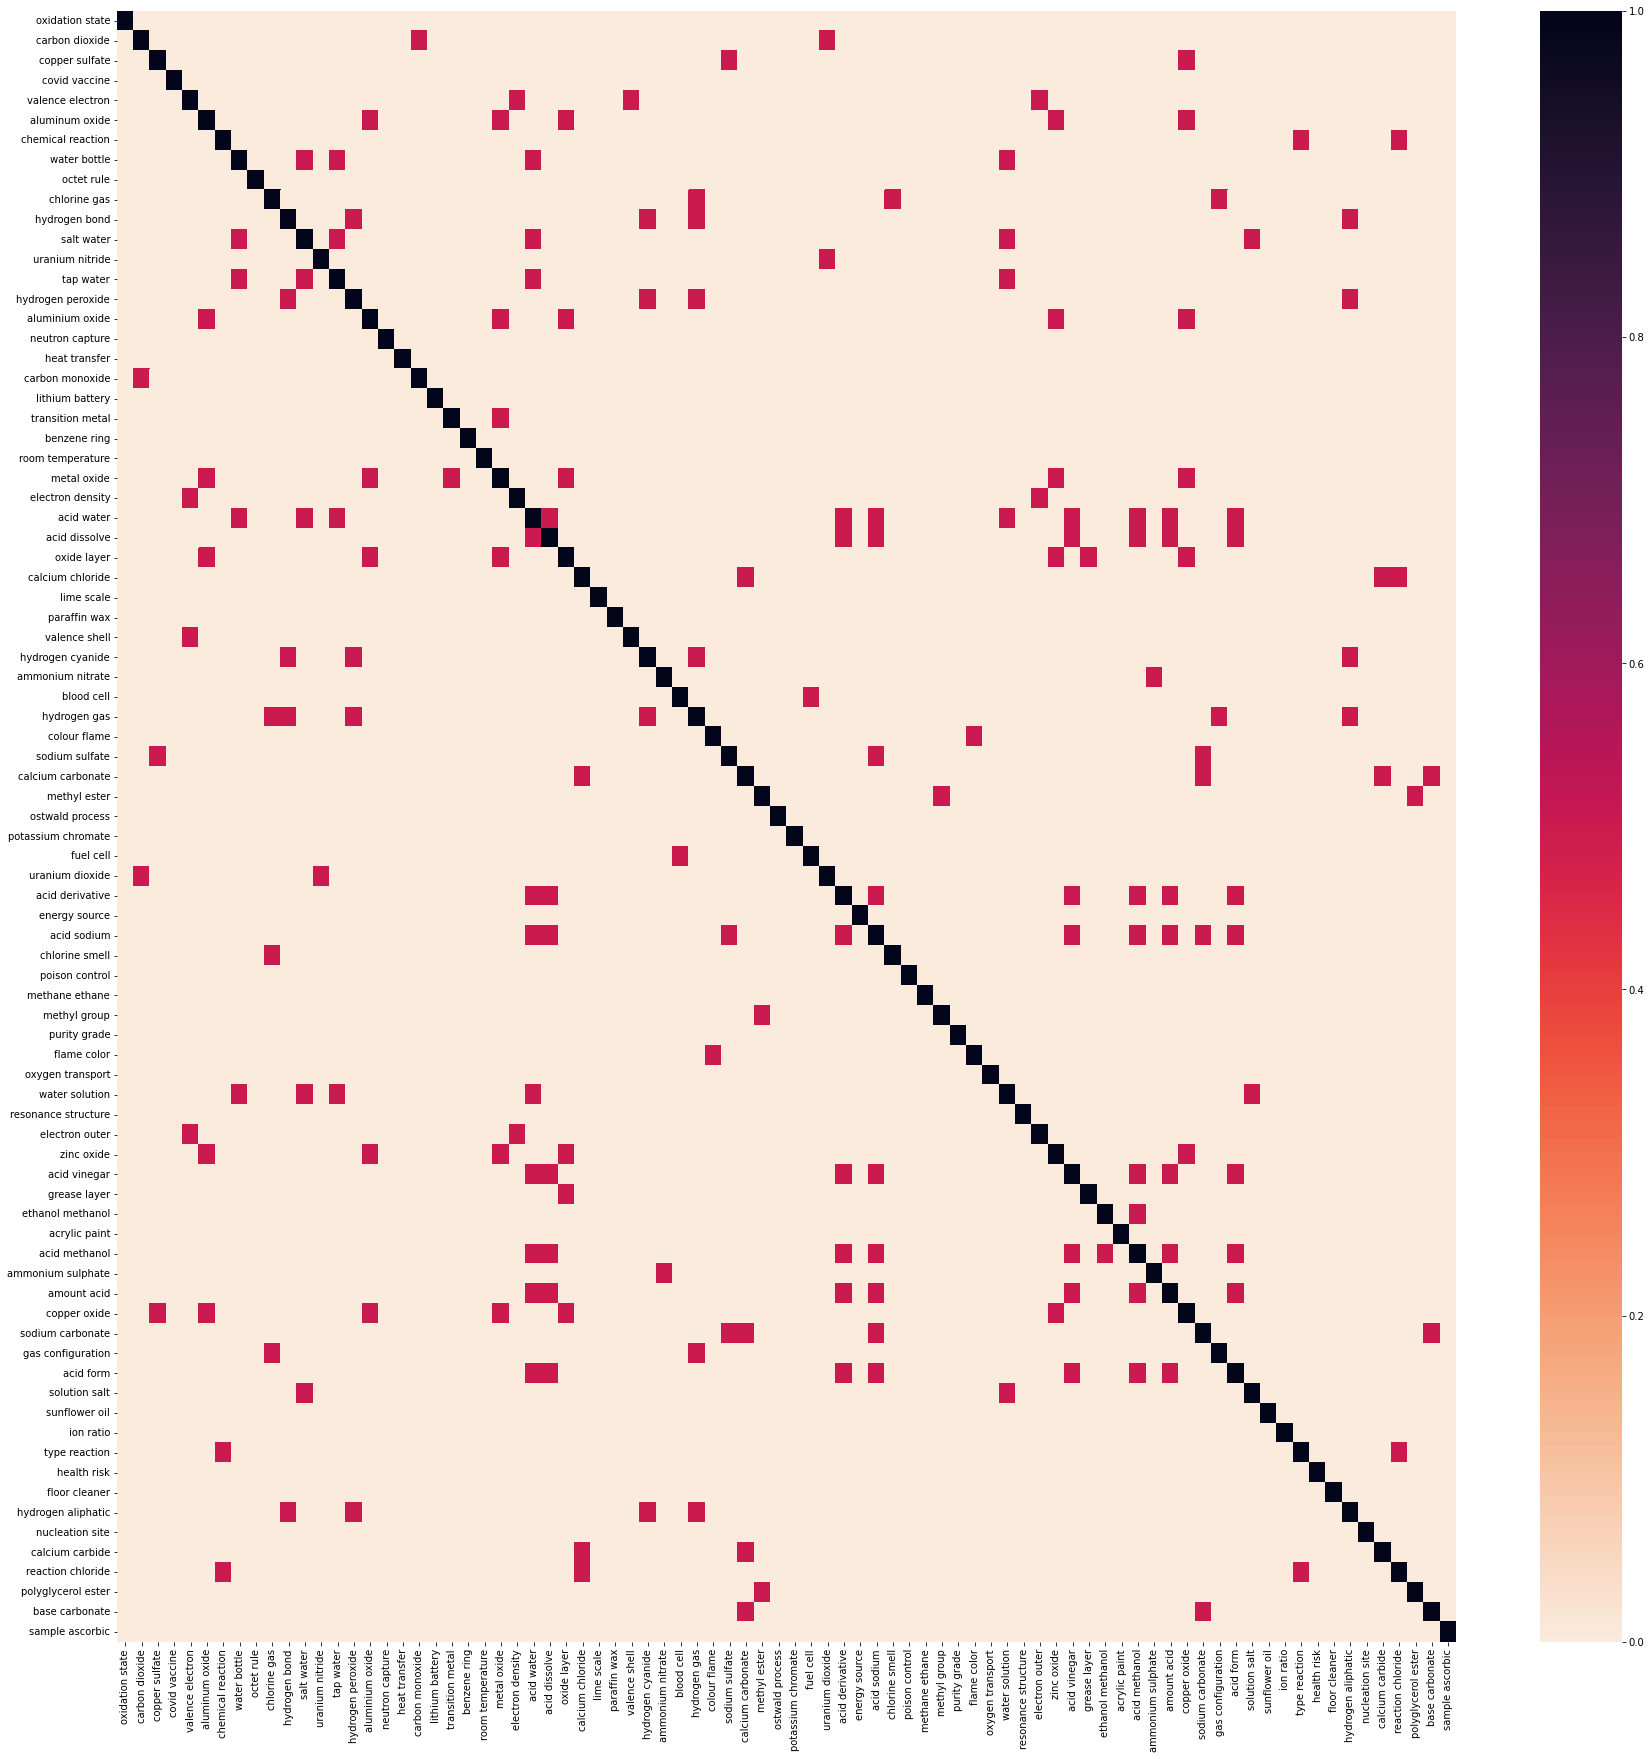

In [35]:
biology_bigrams = ['oxidation state',
 'carbon dioxide',
 'copper sulfate',
 'covid vaccine',
 'valence electron',
 'aluminum oxide',
 'chemical reaction',
 'water bottle',
 'octet rule',
 'chlorine gas',
 'hydrogen bond',
 'salt water',
 'uranium nitride',
 'tap water',
 'hydrogen peroxide',
 'aluminium oxide',
 'neutron capture',
 'heat transfer',
 'carbon monoxide',
 'lithium battery',
 'transition metal',
 'benzene ring',
 'room temperature',
 'metal oxide',
 'electron density',
 'acid water',
 'acid dissolve',
 'oxide layer',
 'calcium chloride',
 'lime scale',
 'paraffin wax',
 'valence shell',
 'hydrogen cyanide',
 'ammonium nitrate',
 'blood cell',
 'hydrogen gas',
 'colour flame',
 'sodium sulfate',
 'calcium carbonate',
 'methyl ester',
 'ostwald process',
 'potassium chromate',
 'fuel cell',
 'uranium dioxide',
 'acid derivative',
 'energy source',
 'acid sodium',
 'chlorine smell',
 'poison control',
 'methane ethane',
 'methyl group',
 'purity grade',
 'flame color',
 'oxygen transport',
 'water solution',
 'resonance structure',
 'electron outer',
 'zinc oxide',
  'safety standard',
 'acid vinegar',
 'grease layer',
 'ethanol methanol',
 'acrylic paint',
 'acid methanol',
 'ammonium sulphate',
 'amount acid',
 'copper oxide',
 'sodium carbonate',
 'gas configuration',
 'acid form',
 'solution salt',
 'sunflower oil',
 'ion ratio',
 'type reaction',
 'health risk',
 'floor cleaner',
 'hydrogen aliphatic',
 'nucleation site',
 'calcium carbide',
 'reaction chloride',
 'polyglycerol ester',
 'base carbonate',
 'sample ascorbic']


X = vectorizer.fit_transform(biology_bigrams)

arr = X.toarray() 

create_heatmap(cosine_similarity(arr), biology_bigrams)

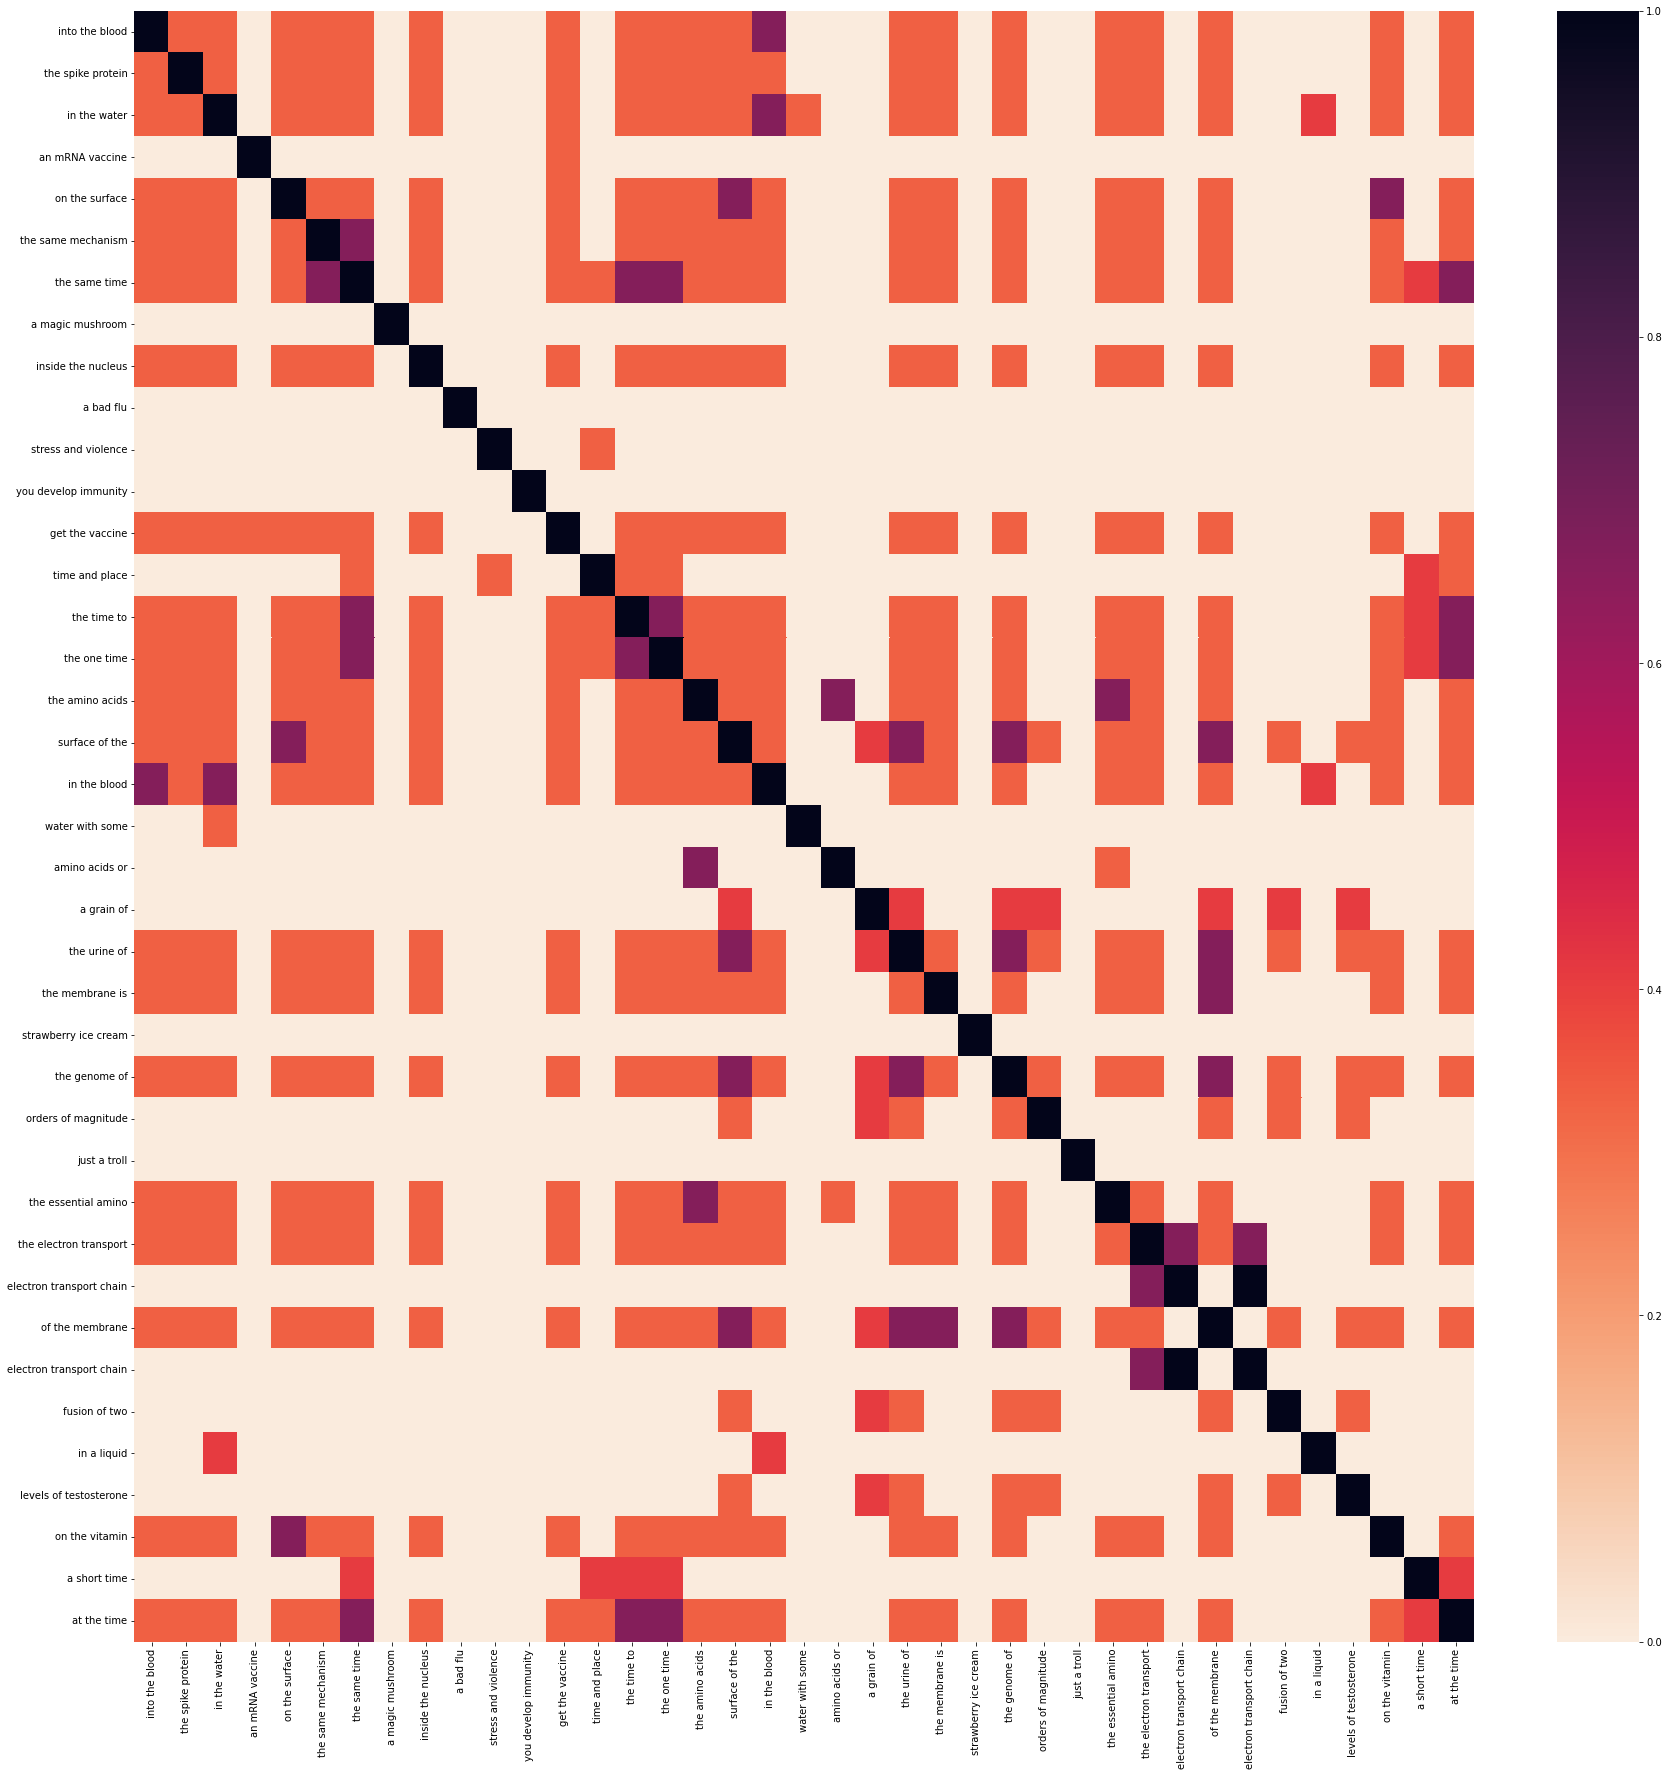

In [10]:
biology_trigram = ['into the blood',
 'the spike protein',
 'in the water',
 'an mRNA vaccine',
 'on the surface',
 'the same mechanism',
 'the same time',
 'a magic mushroom',
 'inside the nucleus',
 'a bad flu',
 'stress and violence',
 'you develop immunity',
 'get the vaccine',
 'time and place',
 'the time to',
 'the one time',
 'the amino acids',
 'surface of the',
 'in the blood',
 'water with some',
 'amino acids or',
 'a grain of',
 'the urine of',
 'the membrane is',
 'strawberry ice cream',
 'the genome of',
 'orders of magnitude',
 'just a troll',
 'the essential amino',
 'the electron transport',
 'electron transport chain',
 'of the membrane',
 'electron transport chain',
 'fusion of two',
 'in a liquid',
 'levels of testosterone',
 'on the vitamin',
 'a short time',
 'at the time']
 
 
X = vectorizer.fit_transform(biology_trigram)

arr = X.toarray() 

create_heatmap(cosine_similarity(arr), biology_trigram)

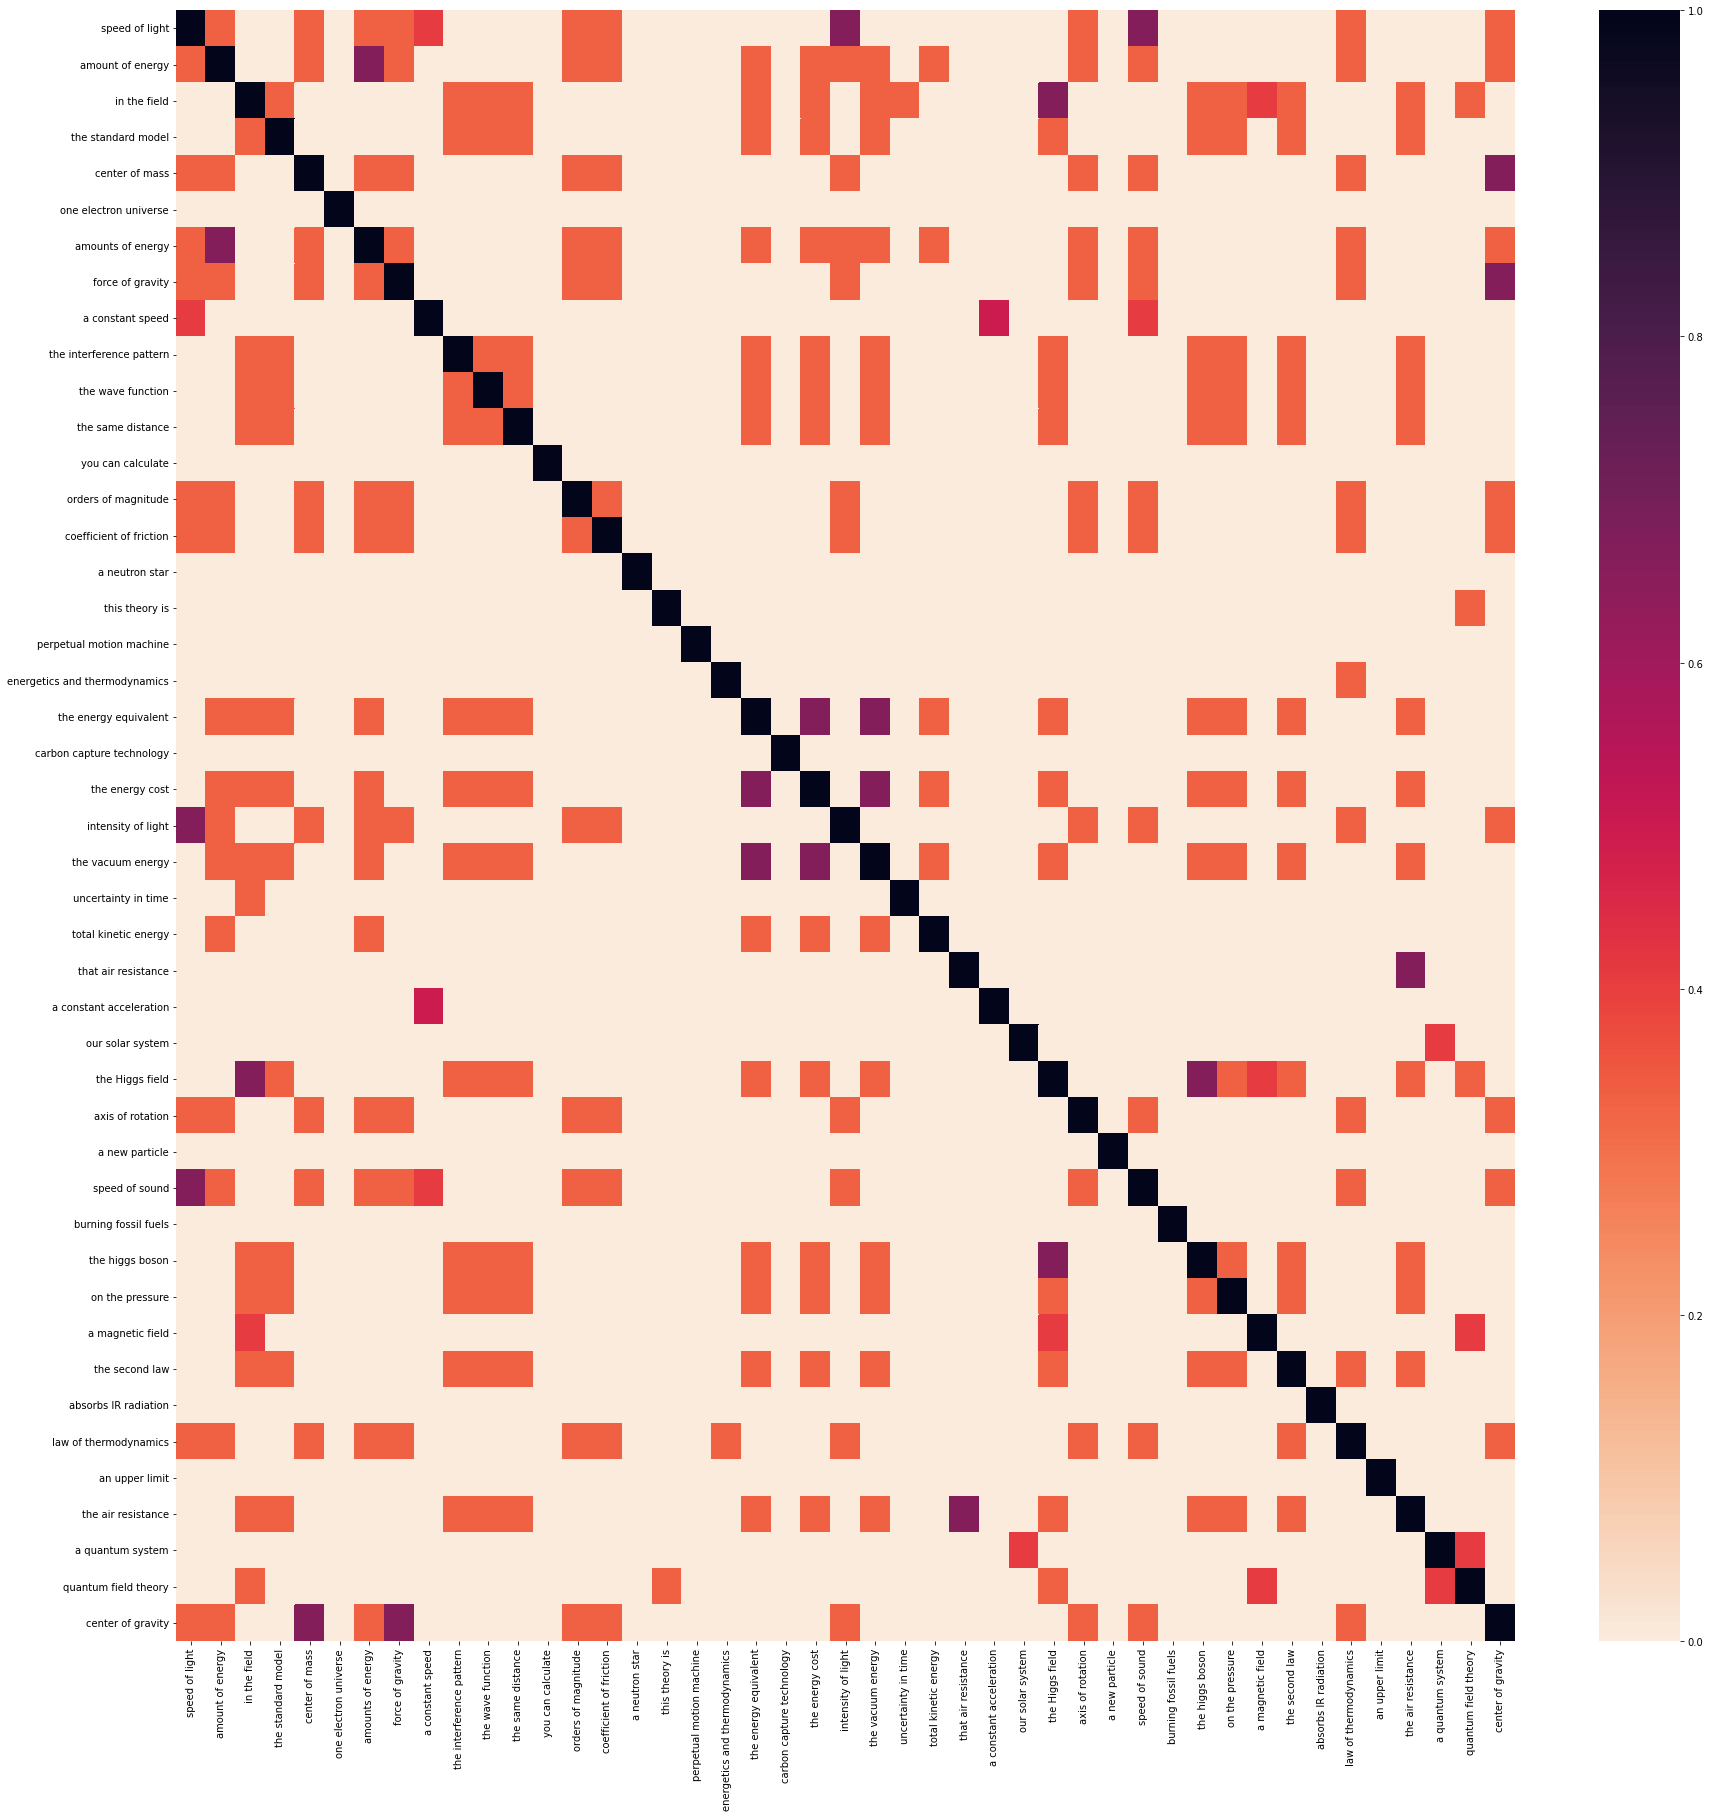

In [11]:
Physics_trigram = ['speed of light',
 'amount of energy',
 'in the field',
 'the standard model',
 'center of mass',
 'one electron universe',
 'amounts of energy',
 'force of gravity',
 'a constant speed', 
 'the interference pattern',
 'the wave function',
 'the same distance',
 'you can calculate',
 'orders of magnitude',
 'coefficient of friction',
 'a neutron star',
 'this theory is',
 'perpetual motion machine',
 'energetics and thermodynamics',
 'the energy equivalent',
 'carbon capture technology',
 'the energy cost',
 'intensity of light',
 'the vacuum energy',
 'uncertainty in time',
 'total kinetic energy',
 'that air resistance',
 'a constant acceleration',
 'our solar system',
 'the Higgs field',
 'axis of rotation',
 'a new particle',
 'speed of sound',
 'burning fossil fuels',
 'the higgs boson',
 'on the pressure',
 'a magnetic field',
 'the second law',
 'absorbs IR radiation',
 'law of thermodynamics',
 'an upper limit',
 'the air resistance',
 'a quantum system',
 'quantum field theory',
 'center of gravity']

X = vectorizer.fit_transform(Physics_trigram)

arr = X.toarray() 

create_heatmap(cosine_similarity(arr), Physics_trigram)

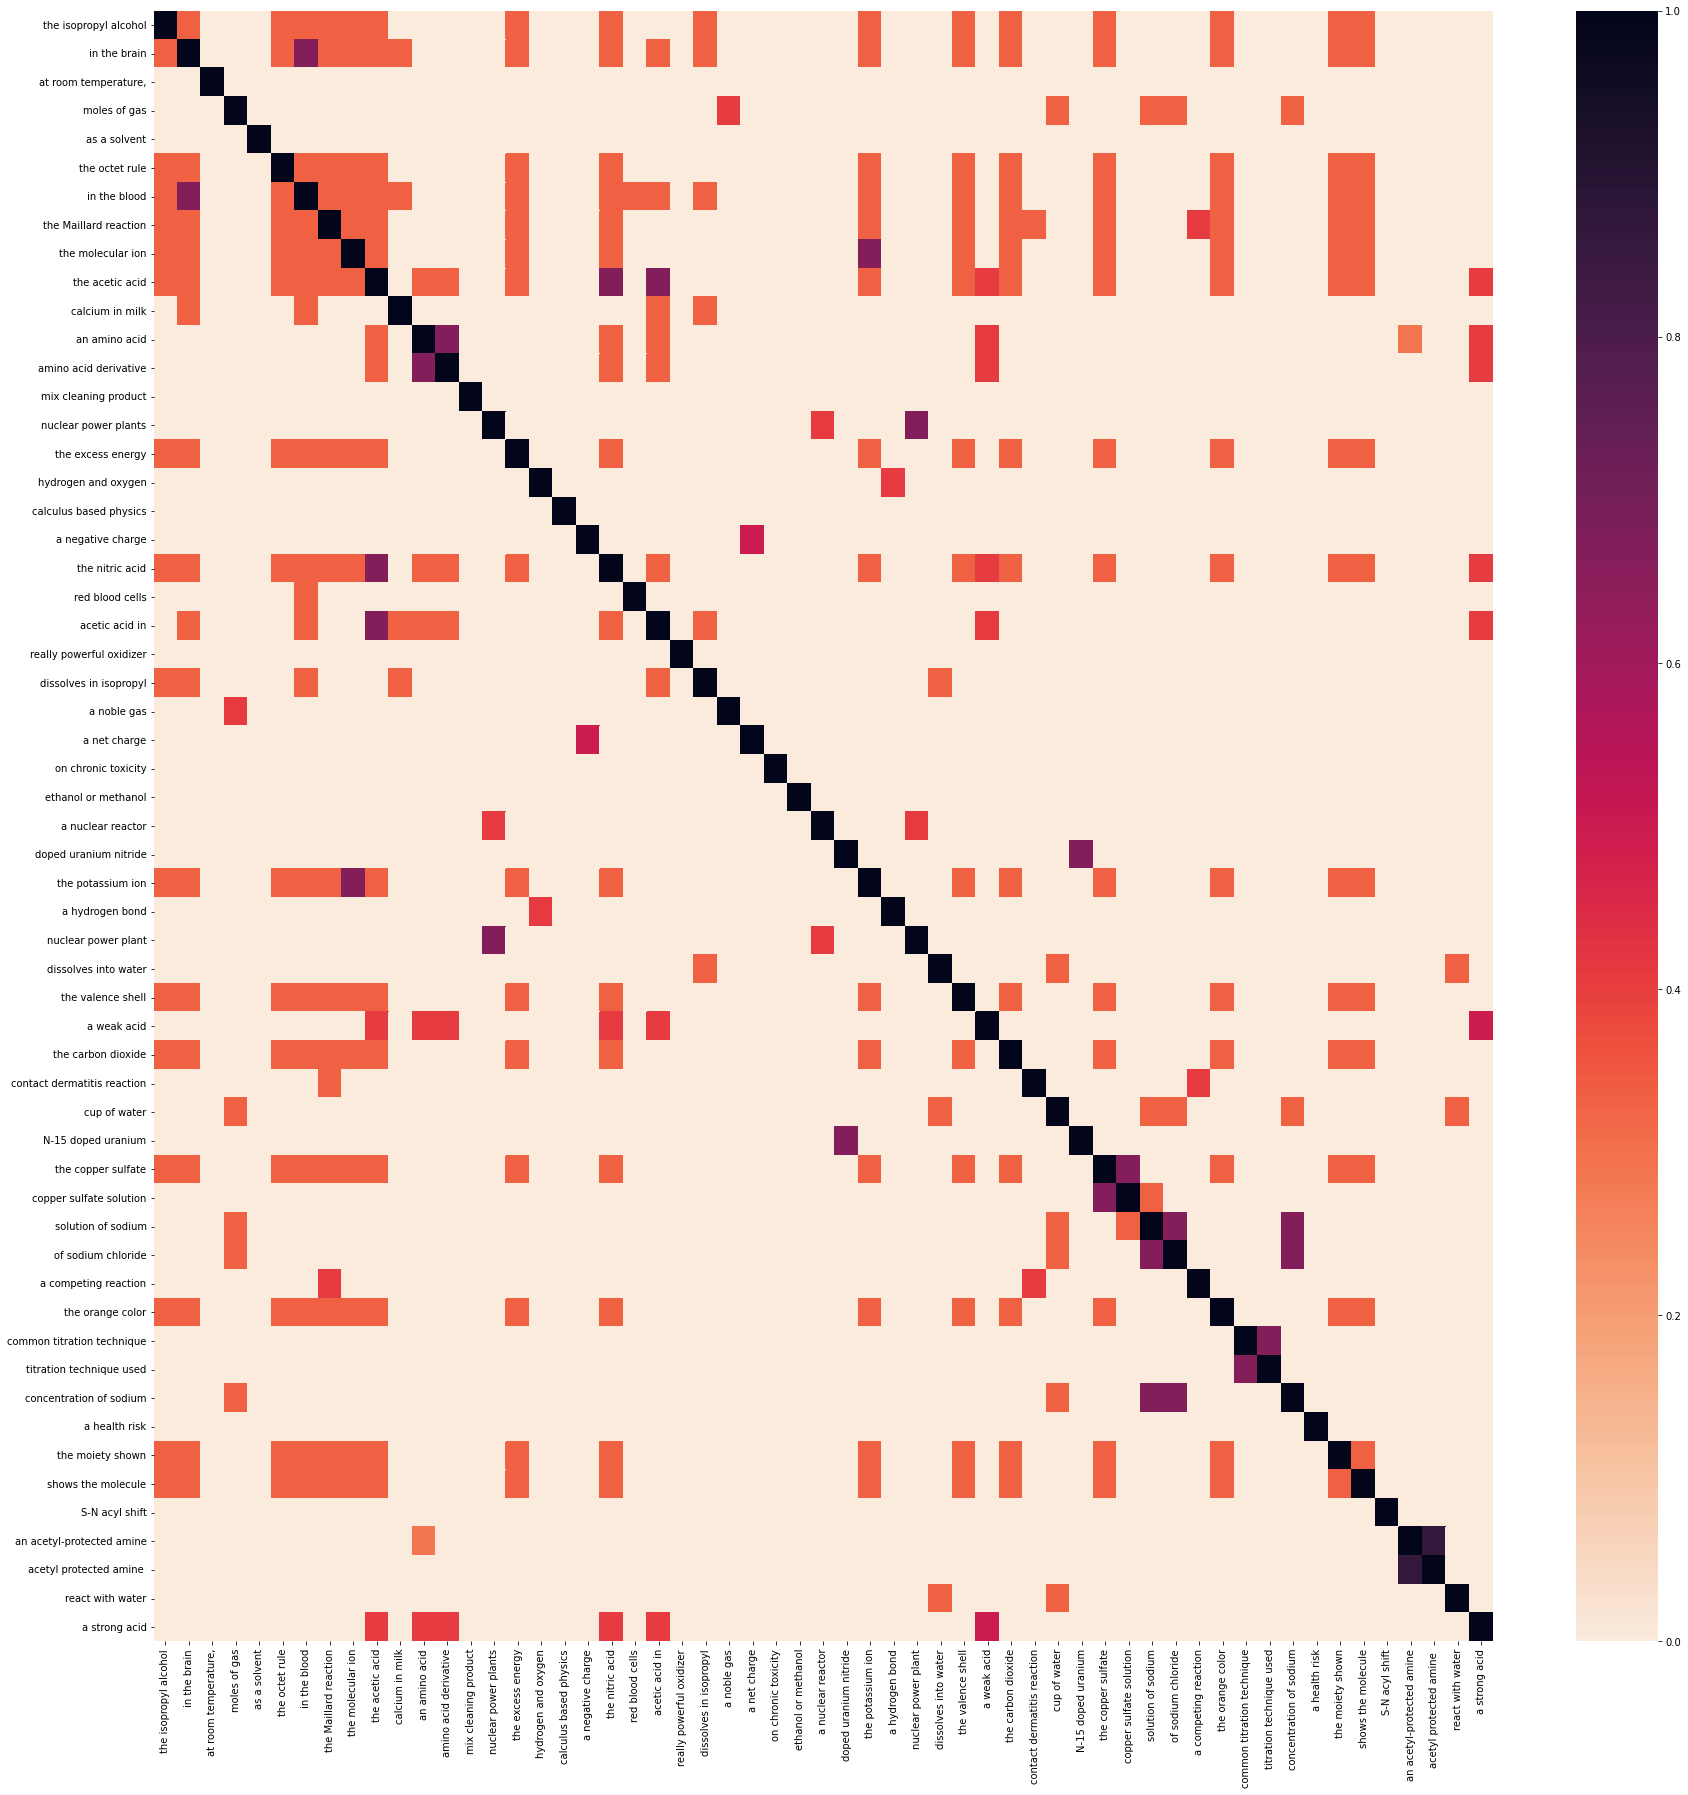

In [12]:
chemistry_trigram = [ 'the isopropyl alcohol',
 'in the brain',
 'at room temperature,',
 'moles of gas',
 'as a solvent',
 'the octet rule',
 'in the blood',
 'the Maillard reaction',
 'the molecular ion',
 'the acetic acid',
 'calcium in milk',
 'an amino acid',
 'amino acid derivative',
 'mix cleaning product',
 'nuclear power plants',
 'the excess energy',
 'hydrogen and oxygen',
 'calculus based physics',
 'a negative charge',
 'the nitric acid',
 'red blood cells',
 'acetic acid in',
 'really powerful oxidizer',
 'dissolves in isopropyl',
 'a noble gas',
 'a net charge',
 'on chronic toxicity',
 'ethanol or methanol',
 'a nuclear reactor',
 'doped uranium nitride',
 'the potassium ion',
 'a hydrogen bond',
 'nuclear power plant',
 'dissolves into water',
 'the valence shell',
 'a weak acid',
 'the carbon dioxide',
 'contact dermatitis reaction',
 'cup of water',
 'N-15 doped uranium',
 'the copper sulfate',
 'copper sulfate solution',
 'solution of sodium',
 'of sodium chloride',
 'a competing reaction',
 'the orange color',
 'common titration technique',
 'titration technique used',
 'concentration of sodium',
 'a health risk',
 'the moiety shown',
 'shows the molecule',
 'S-N acyl shift',
 'an acetyl-protected amine',
 'acetyl protected amine ',
 'react with water',
 'a strong acid',]

X = vectorizer.fit_transform(chemistry_trigram)

arr = X.toarray() 

create_heatmap(cosine_similarity(arr), chemistry_trigram)